# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [80]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
'''
(1) Your own median filter algorithm
'''

def median_filter(image, window_width, window_height):
    edgex = window_width // 2
    edgey = window_height // 2

    filtered_image = np.empty(image.shape)
    
    for x in range(edgex, image.shape[0] - edgex):
        for y in range(edgey, image.shape[1] - edgey):
            color_array = np.empty((window_width, window_height))
            for i in range(0, window_width):
                for j in range(0, window_height):
                    color_array[i][j] = image[i + x - edgex][j + y - edgey]
            filtered_image[x][y] = np.median(a = color_array, axis = None)
    return filtered_image


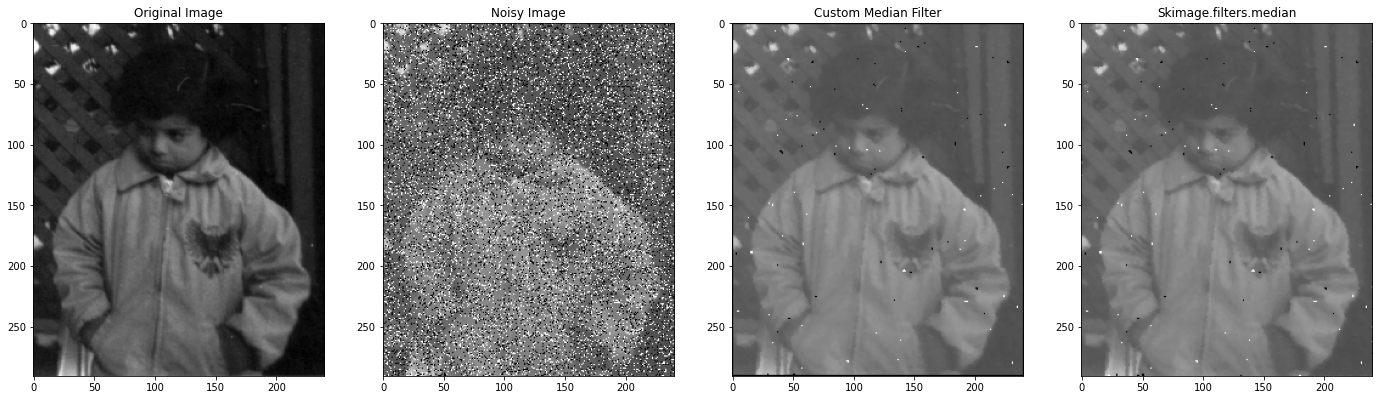

None


In [88]:
image = io.imread('pout.tif')
noisy_image = random_noise(image, mode = "s&p", amount = 0.2)
show_images([image, noisy_image, median_filter(noisy_image, 3, 3), median(noisy_image)],
            ['Original Image', 'Noisy Image', 'Custom Median Filter', 'Skimage.filters.median'])


In [ ]:
'''
(2) skimage median filter
'''

In [ ]:
'''
(3) Gaussion Filters
'''